This one has scans over large range params, with DMASS= 2 for h1 and h2

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)

In [2]:
from common_plots import *

In [3]:
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv491_HBv431_HSv140_largeRange_fixDMass_10_May_16_2357.h5")
# df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

In [4]:
store.close()

In [5]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var

In [6]:
df_pass_all_ma1 = subset_var(df_pass_all, 3.5, 10.5, 'ma1')

In [7]:
print 'relaxed constraints:', len(df_pass_all.index) 
print 'With ma1 < 10.5:', len(df_pass_all_ma1.index)


relaxed constraints: 21898
With ma1 < 10.5: 491


/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


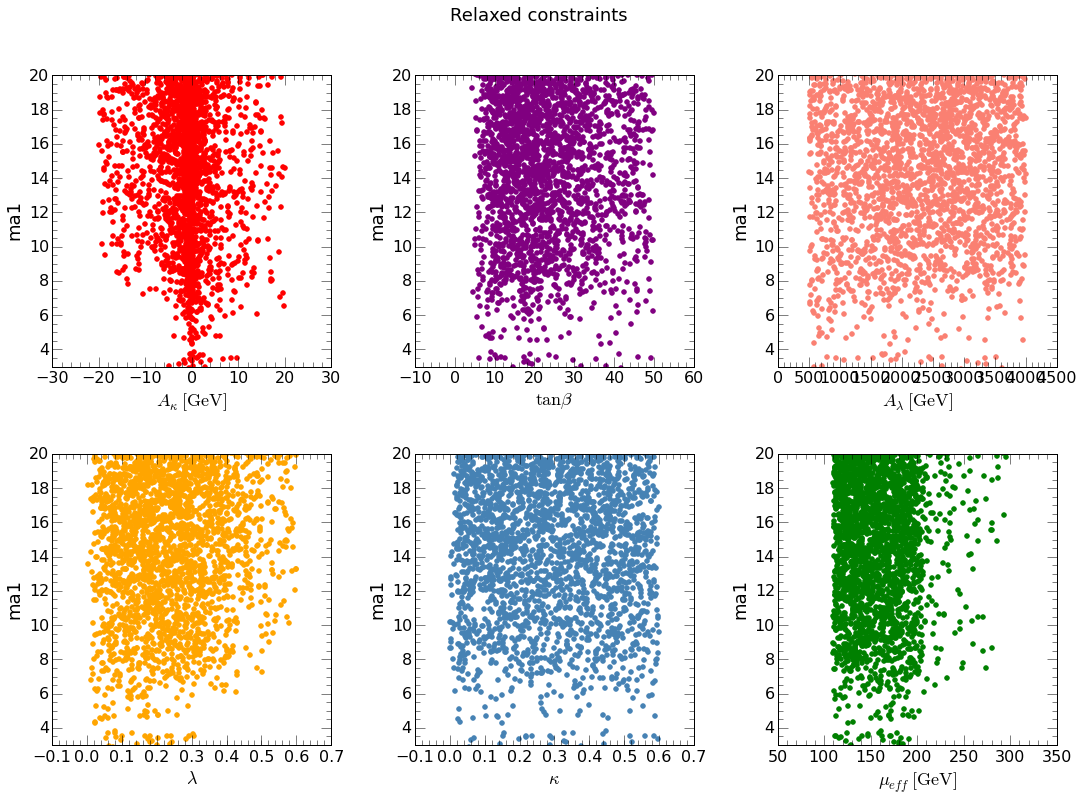

In [8]:
plot_input_params_scatters(df_pass_all, 'ma1', 'ma1', yrange=[3, 20], title='Relaxed constraints')

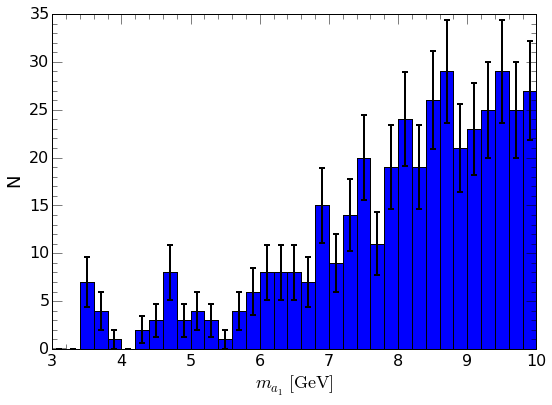

In [9]:
_ = plot_histogram(df=df_pass_all_ma1, var='ma1', range=[3, 10], bins=35, xlabel=r'$m_{a_1}\mathrm{\ [GeV]}$')

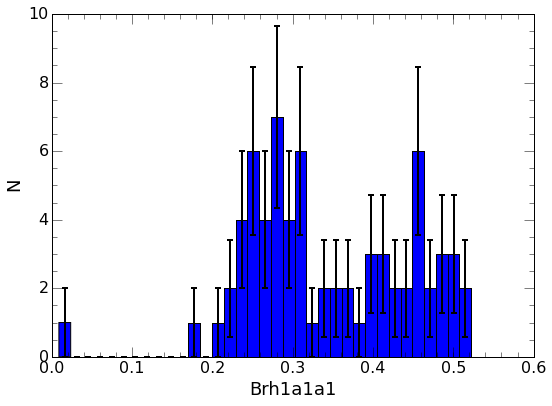

In [40]:
_ = plot_histogram(df=df_fail_NT_pass_HS_pass_HB.query('122<mh1<128 & ma1<10.5'), var='Brh1a1a1', bins=35)

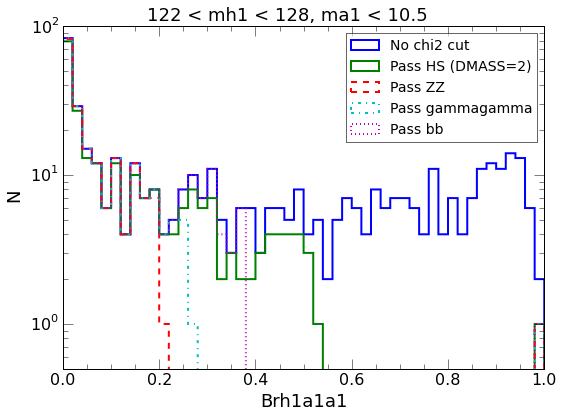

In [72]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14)
plt.yscale('log')
plt.ylim(0.5, 100)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')

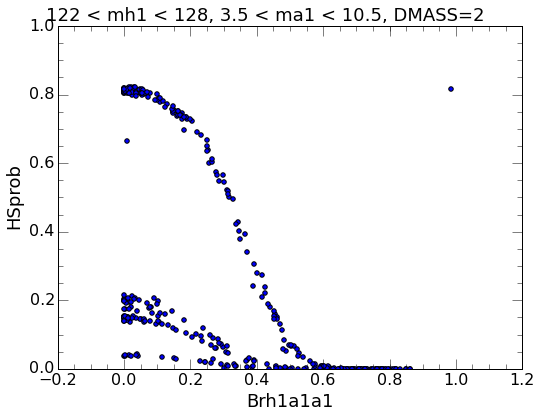

In [84]:
query_str = '122<mh1<128'

_ = plot_scatter(df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.0000].query(query_str), xvar='Brh1a1a1', yvar='HSprob')
plt.ylim(0, 1)
plt.suptitle('122 < mh1 < 128, 3.5 < ma1 < 10.5, DMASS=2')

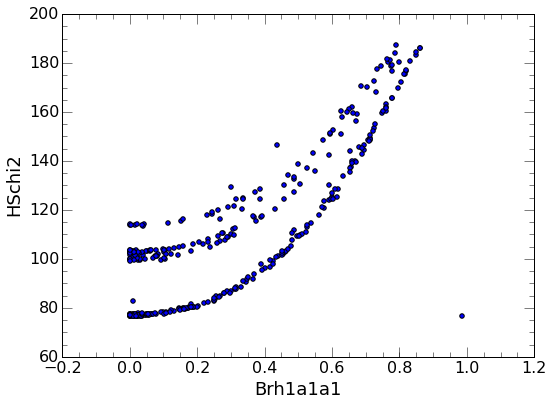

In [83]:
query_str = '122<mh1<128'

_ = plot_scatter(df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.0000].query(query_str), xvar='Brh1a1a1', yvar='HSchi2')
# plt.ylim(0, 1)

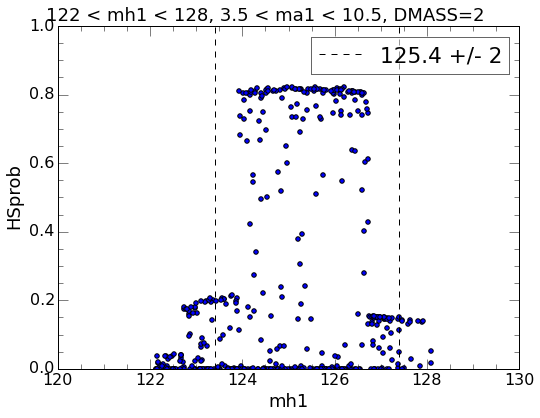

In [85]:
_ = plot_scatter(df=df_pass_all_ma1, xvar='mh1', yvar='HSprob')
plt.vlines([125.4-2, 125.4+2], 0, 1, linestyle='dashed', label='125.4 +/- 2')
plt.ylim(0, 1)
plt.legend(loc=0)
plt.xlim(120, 130)
plt.suptitle('122 < mh1 < 128, 3.5 < ma1 < 10.5, DMASS=2')

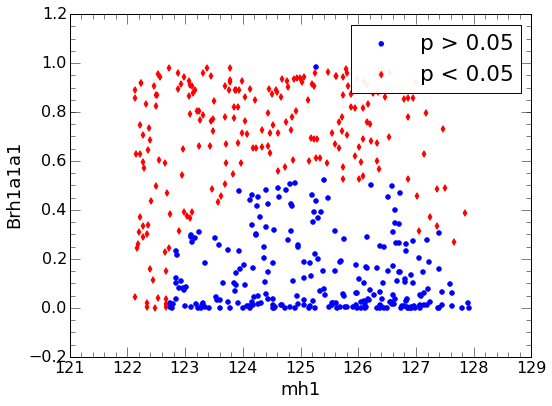

In [82]:
query_str = '122<mh1<128'

_ = plot_scatter(df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                 xvar='mh1', yvar='Brh1a1a1', color='blue', label='p > 0.05')
_ = plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob<0.05].query(query_str), 
                 xvar='mh1', yvar='Brh1a1a1', color='red', label='p < 0.05', marker='d')
plt.legend(loc=0, framealpha=0.95)

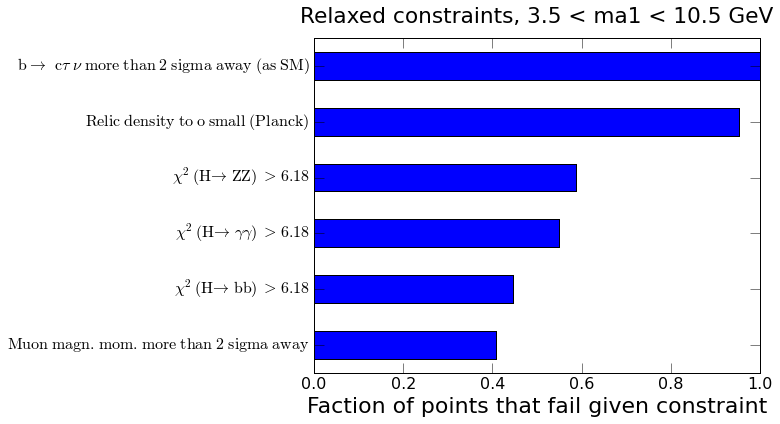

In [12]:
plot_constraints(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV')

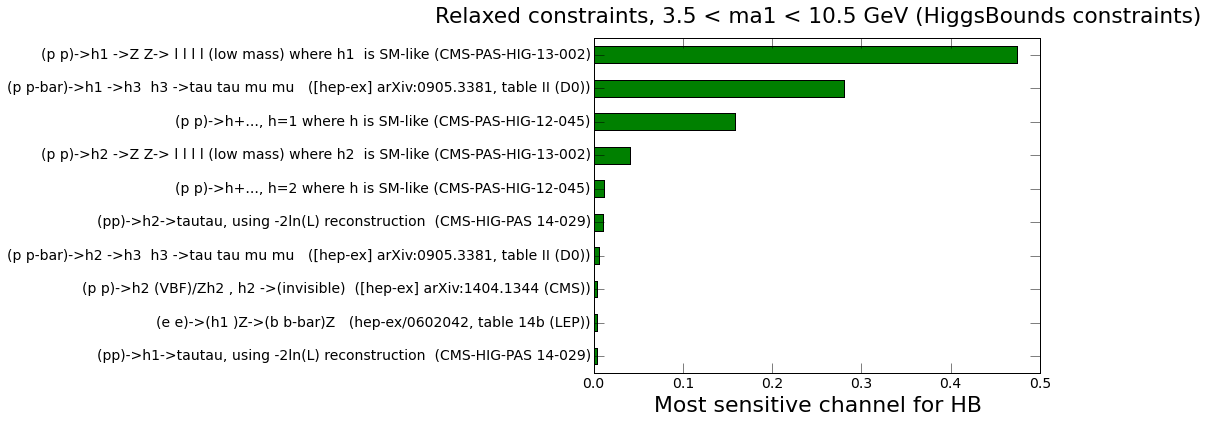

In [13]:
plot_constraints_HB(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV (HiggsBounds constraints)')

In [14]:
# We need to divide up the dataset into several groupings:
# - pass NT chi2 or fail
# - pass HS chi2 or fail
# - pass HB or fail

fail_NT_chi2 = df_pass_all.constraints.str.contains('chi2')
pass_NT_chi2 = ~ fail_NT_chi2

fail_HS = df_pass_all.HSprob < 0.05
pass_HS = ~fail_HS

fail_HB = df_pass_all.HBresult == 0
pass_HB = ~fail_HB

In [15]:
pass_gm2 = ~df_pass_all.constraints.str.contains('Muon')
pass_relic = ~df_pass_all.constraints.str.contains('Relic')

In [16]:
df_fail_NT_fail_HS_fail_HB = df_pass_all[fail_NT_chi2 & fail_HS & fail_HB]
df_fail_NT_fail_HS_pass_HB = df_pass_all[fail_NT_chi2 & fail_HS & pass_HB]

df_fail_NT_pass_HS_fail_HB = df_pass_all[fail_NT_chi2 & pass_HS & fail_HB]
df_fail_NT_pass_HS_pass_HB = df_pass_all[fail_NT_chi2 & pass_HS & pass_HB]

df_pass_NT_pass_HS_fail_HB = df_pass_all[pass_NT_chi2 & pass_HS & fail_HB]
df_pass_NT_pass_HS_pass_HB = df_pass_all[pass_NT_chi2 & pass_HS & pass_HB]
df_pass_NT_fail_HS_fail_HB = df_pass_all[pass_NT_chi2 & fail_HS & fail_HB]
df_pass_NT_fail_HS_pass_HB = df_pass_all[pass_NT_chi2 & fail_HS & pass_HB]

In [18]:
print 'Fail NT, fail HS, fail HB:', len(df_fail_NT_fail_HS_fail_HB.index)
print 'Fail NT, fail HS, pass HB:', len(df_fail_NT_fail_HS_pass_HB.index)
print 'Fail NT, pass HS, fail HB:', len(df_fail_NT_pass_HS_fail_HB.index)
print 'Fail NT, pass HS, pass HB:', len(df_fail_NT_pass_HS_pass_HB.index)
print 'Pass NT, pass HS, fail HB:', len(df_pass_NT_pass_HS_fail_HB.index)
print 'Pass NT, pass HS, pass HB:', len(df_pass_NT_pass_HS_pass_HB.index)
print 'Pass NT, fail HS, fail HB:', len(df_pass_NT_fail_HS_fail_HB.index)
print 'Pass NT, fail HS, pass HB:', len(df_pass_NT_fail_HS_pass_HB.index)

Fail NT, fail HS, fail HB: 170
Fail NT, fail HS, pass HB: 8844
Fail NT, pass HS, fail HB: 1
Fail NT, pass HS, pass HB: 3429
Pass NT, pass HS, fail HB: 0
Pass NT, pass HS, pass HB: 8571
Pass NT, fail HS, fail HB: 0
Pass NT, fail HS, pass HB: 883


In [19]:
df_fail_NT_fail_HS_fail_HB.columns.values

array(['Bra1bb', 'Bra1cc', 'Bra1gg', 'Bra1mumu', 'Bra1ss', 'Bra1tautau',
       'Brh1a1a1', 'Brh1a1z', 'Brh1bb', 'Brh1cc', 'Brh1gammagamma',
       'Brh1gg', 'Brh1mumu', 'Brh1tautau', 'Brh1ww', 'Brh1zgamma',
       'Brh1zz', 'Brh2a1a1', 'Brh2a1z', 'Brh2bb', 'Brh2gammagamma',
       'Brh2gg', 'Brh2h1h1', 'Brh2tautau', 'Brh2ww', 'Brh2zgamma',
       'Brh2zz', 'Del_a_mu', 'HBchannel', 'HBobsratio', 'HBresult',
       'HSchi2', 'HSnobs', 'HSprob', 'a1bbrc2', 'a1ggrc2', 'a1tautaurc2',
       'ad3', 'ae2', 'ae3', 'akappa', 'alambda', 'au3', 'bsgamma',
       'bsmumu', 'btaunu', 'constraints', 'delmd', 'delms', 'file',
       'h1bbrc2', 'h1ggrc2', 'h1vvrc2', 'h2bbrc2', 'h2ggrc2', 'h2vvrc2',
       'h3bbrc2', 'h3ggrc2', 'h3vvrc2', 'kappa', 'lambda_', 'm1', 'm2',
       'm3', 'ma1', 'ma2', 'mchargino1', 'md2', 'md3', 'me2', 'me3',
       'mgluino', 'mh1', 'mh2', 'mh3', 'mhc', 'ml2', 'ml3', 'mneutralino1',
       'mneutralino2', 'mq2', 'mq3', 'msbottom1', 'msbottom2', 'mstop1',
       'mstop2', 

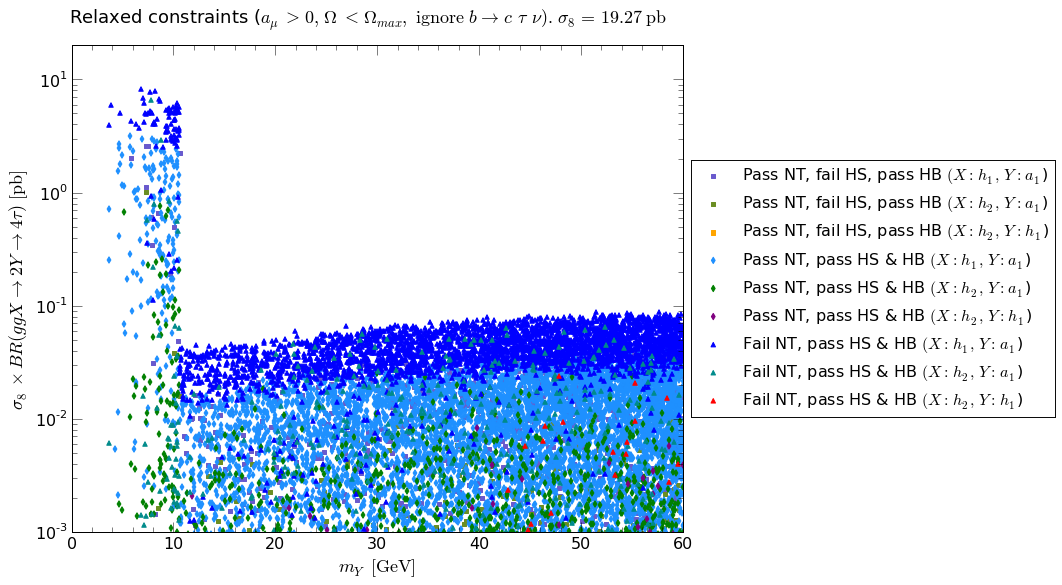

In [20]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS, pass HB ' + lab_h1a1, 
                 color='slateblue', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS, pass HB ' + lab_h2a1, 
                 color='olivedrab', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2h1, label='Pass NT, fail HS, pass HB ' + lab_h2h1, 
                 color='orange', marker='s')


# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Fail NT, fail HS, pass HB ' + lab_h1a1, 
#                  color='slateblue', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Fail NT, fail HS, pass HB ' + lab_h2a1, 
#                  color='olivedrab', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2h1, label='Fail NT, fail HS, pass HB ' + lab_h2h1, 
#                  color='orange', marker='o')

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
#                  color='cyan', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
#                  color='lime', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
#                  color='magenta', marker='v')



box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(loc='center left', fontsize=16, framealpha=0.95, bbox_to_anchor=(1, 0.5))
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 20)
plt.xlim(0, 60)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

(<matplotlib.axes._subplots.AxesSubplot at 0x10afe1a10>,
 <matplotlib.collections.PathCollection at 0x10fba21d0>)

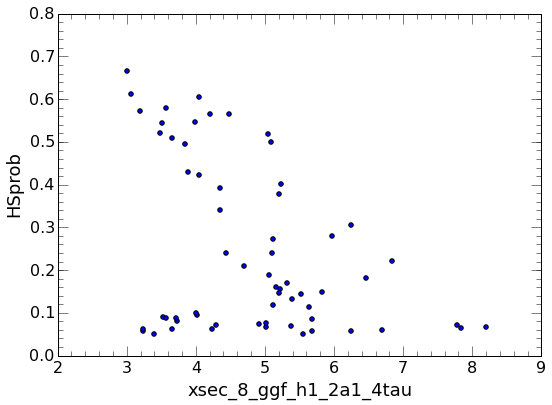

In [21]:
plot_scatter(df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>3'), xvar='xsec_8_ggf_h1_2a1_4tau', yvar='HSprob')

ERROR! Session/line number was not unique in database. History logging moved to new session 567


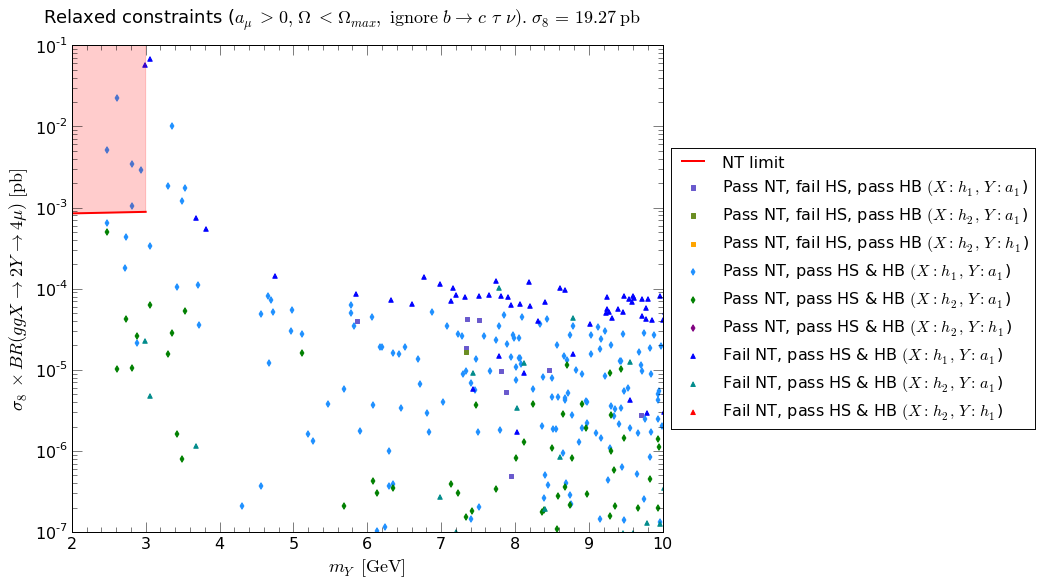

In [22]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4mu' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4mu' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4mu' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS, pass HB ' + lab_h1a1, 
                 color='slateblue', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS, pass HB ' + lab_h2a1, 
                 color='olivedrab', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2h1, label='Pass NT, fail HS, pass HB ' + lab_h2h1, 
                 color='orange', marker='s')


# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Fail NT, fail HS, pass HB ' + lab_h1a1, 
#                  color='slateblue', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Fail NT, fail HS, pass HB ' + lab_h2a1, 
#                  color='olivedrab', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2h1, label='Fail NT, fail HS, pass HB ' + lab_h2h1, 
#                  color='orange', marker='o')

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
#                  color='cyan', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
#                  color='lime', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
#                  color='magenta', marker='v')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4\mu)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

m_4mu = [0.25, 0.5, 0.75, 1, 2, 3]
xsec_4mu = [3.8E-3, 3.6E-3, 4.1E-3, 4.2E-3, 4.4E-3, 4.6E-3] # these are BR percentages not fractions!
xsec_4mu = [19.27 * x * 1E-2 for x in xsec_4mu]
plt.plot(m_4mu, xsec_4mu, 'r', label='NT limit', linewidth=2)
y_top = plt.ylim()[1]
upper_edge = np.ones_like(m_4mu) * y_top
plt.fill_between(m_4mu, xsec_4mu,
                 y2=upper_edge,
                 color='red',
                 alpha=0.2, label='NT exclude 4mu')
plt.ylim(1E-7, 0.1)
plt.xlim(2, 10)
plt.legend(loc='center left', fontsize=16, framealpha=0.95, bbox_to_anchor=(1, 0.5))


In [ ]:
df_pass_all.columns.values

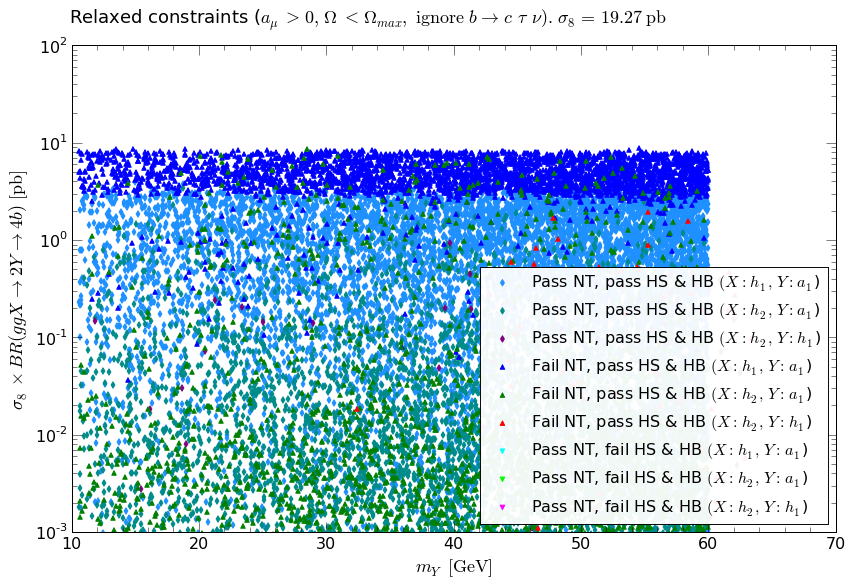

In [23]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4b' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4b' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4b' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4b)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 100)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

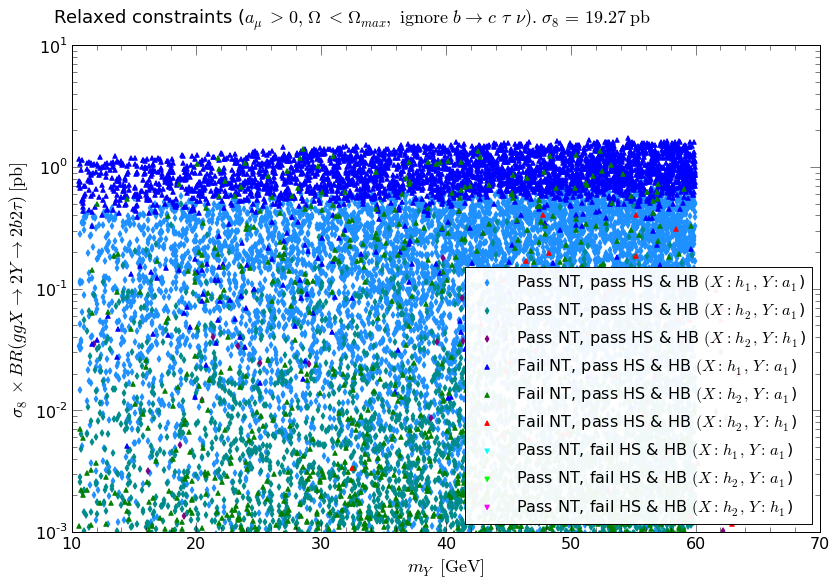

In [24]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_2b2tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_2b2tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_2b2tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 2b2\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 10)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

In [25]:
# Save to CSV for portability
import os
odir = 'range_large_final_relaxed_DMASS2'
if not os.path.isdir(odir):
    os.makedirs(odir)
col_list=['ma1', 'mh1', 'mh2', 
          'xsec_8_ggf_h1_2a1_4tau', 'xsec_8_ggf_h2_2a1_4tau', 'xsec_8_ggf_h2_2h1_4tau', 
          'xsec_8_ggf_h1_2a1_4b', 'xsec_8_ggf_h2_2a1_4b', 'xsec_8_ggf_h2_2h1_4b', 
          'xsec_8_ggf_h1_2a1_2b2tau', 'xsec_8_ggf_h2_2a1_2b2tau', 'xsec_8_ggf_h2_2h1_2b2tau',
          'xsec_8_ggf_h1_2a1_2tau2mu', 'xsec_8_ggf_h2_2a1_2tau2mu', 'xsec_8_ggf_h2_2h1_2tau2mu',
          'xsec_8_ggf_h1_2a1_4mu', 'xsec_8_ggf_h2_2a1_4mu', 'xsec_8_ggf_h2_2h1_4mu']

df_fail_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)

In [26]:
df_fail_NT_fail_HS_fail_HB[col_list].query('ma1<4')

,ma1,mh1,mh2,xsec_8_ggf_h1_2a1_4tau,xsec_8_ggf_h2_2a1_4tau,xsec_8_ggf_h2_2h1_4tau,xsec_8_ggf_h1_2a1_4b,xsec_8_ggf_h2_2a1_4b,xsec_8_ggf_h2_2h1_4b,xsec_8_ggf_h1_2a1_2b2tau,xsec_8_ggf_h2_2a1_2b2tau,xsec_8_ggf_h2_2h1_2b2tau,xsec_8_ggf_h1_2a1_2tau2mu,xsec_8_ggf_h2_2a1_2tau2mu,xsec_8_ggf_h2_2h1_2tau2mu,xsec_8_ggf_h1_2a1_4mu,xsec_8_ggf_h2_2a1_4mu,xsec_8_ggf_h2_2h1_4mu


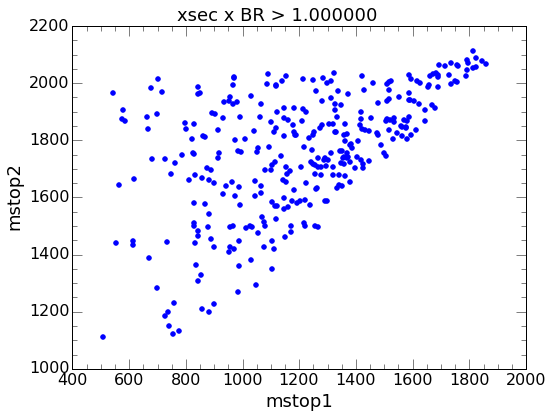

In [27]:
limit = 1
plot_scatter(df=df_pass_all.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='blue')
plt.suptitle('xsec x BR > %f' % limit)

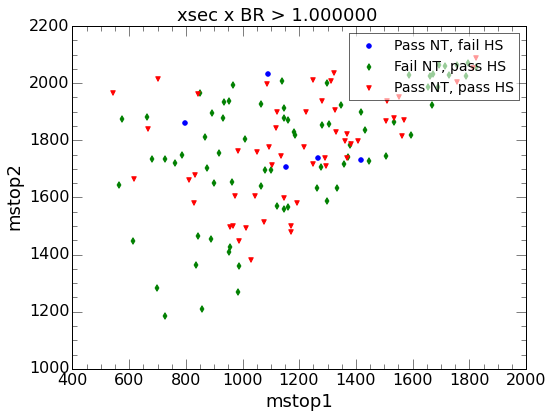

In [28]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop1', yvar='mstop2', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

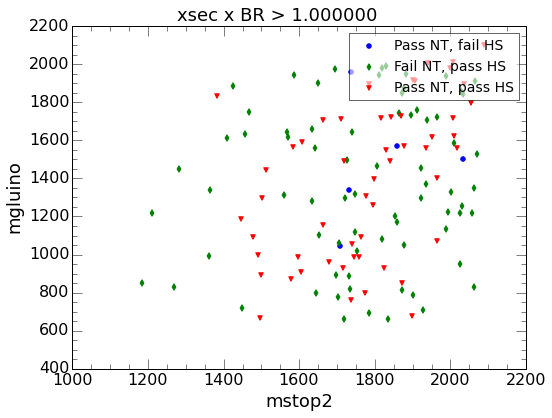

In [29]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mstop2', yvar='mgluino', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

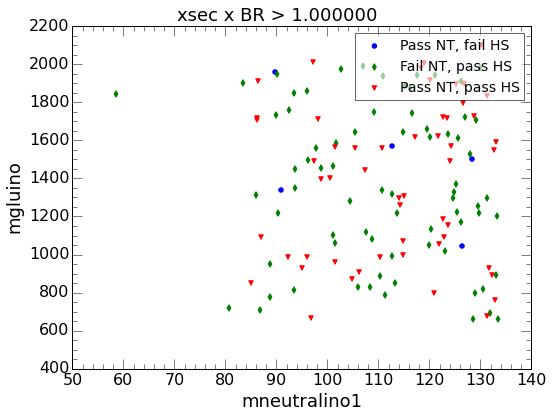

In [30]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mgluino', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)

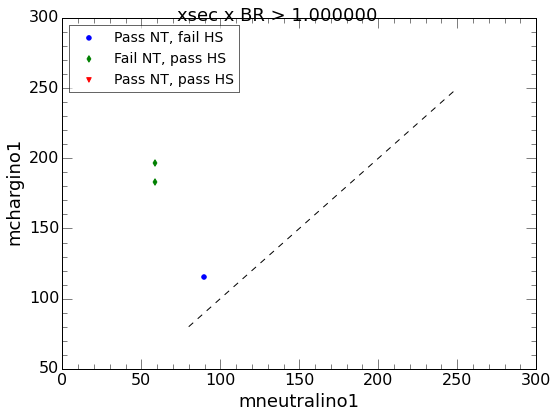

In [31]:
limit = 1
plot_scatter(df=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h2_2a1_4tau>%f' % limit), xvar='mneutralino1', yvar='mchargino1', color='red', label='Pass NT, pass HS', marker='v')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)
plt.plot([80, 250], [80, 250], 'k--')

(0, 40)

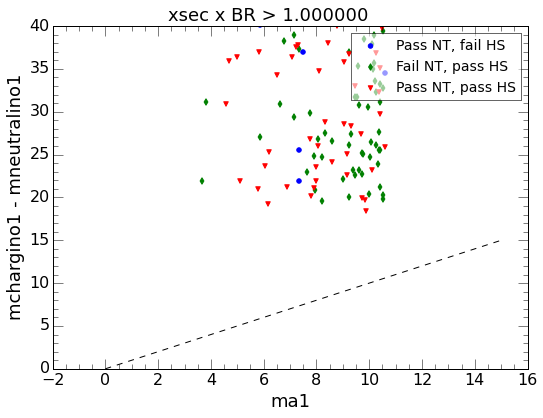

In [32]:
limit = 1
plot_scatter(xarray=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_pass_NT_fail_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='blue', label='Pass NT, fail HS')
plot_scatter(ax=plt.gca(), xarray=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='green', label='Fail NT, pass HS', marker='d')
plot_scatter(ax=plt.gca(), xarray=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).ma1.values,
             yarray=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mchargino1.values - df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>%f' % limit).mneutralino1.values, 
             color='red', label='Pass NT, pass HS', marker='v')
plt.ylabel('mchargino1 - mneutralino1')
plt.xlabel('ma1')
plt.suptitle('xsec x BR > %f' % limit)
plt.legend(loc=0, fontsize=14)
plt.plot([0, 15], [0, 15], 'k--')
plt.ylim([0, 40])

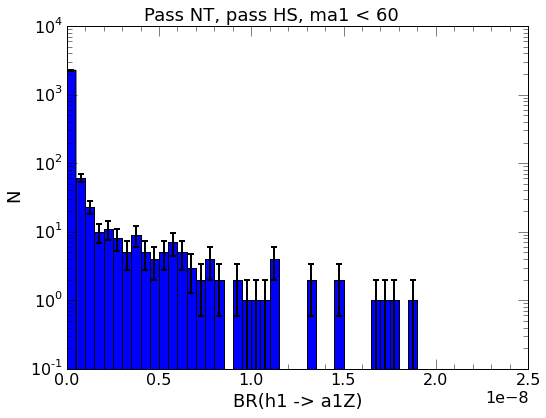

In [33]:
_ = plot_histogram(array=df_pass_NT_pass_HS_pass_HB.Brh1a1z.dropna().values, bins=40, range=[0, 2E-8])
plt.yscale('log')
plt.xlabel('BR(h1 -> a1Z)')
plt.suptitle('Pass NT, pass HS, ma1 < 60')

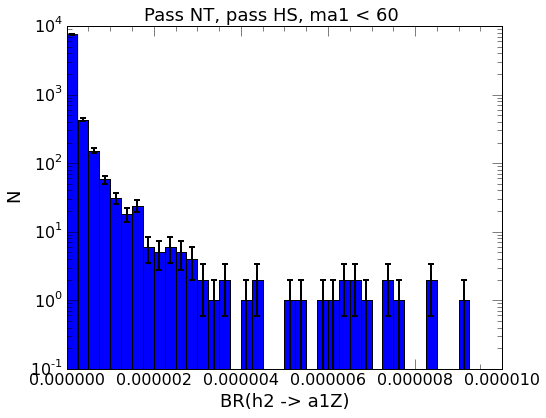

In [34]:
_ = plot_histogram(array=df_pass_NT_pass_HS_pass_HB.Brh2a1z.dropna().values, bins=40, range=[0, 0.00001])
plt.yscale('log')
plt.xlabel('BR(h2 -> a1Z)')
plt.suptitle('Pass NT, pass HS, ma1 < 60')

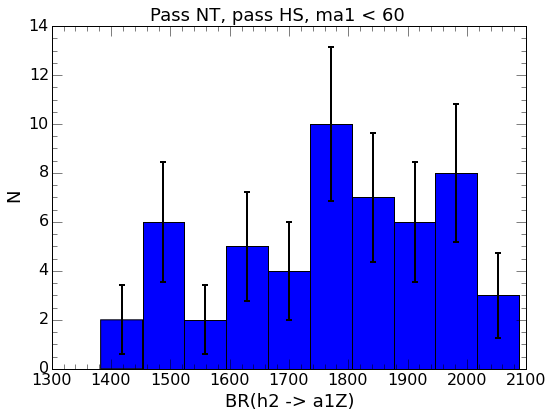

In [35]:
_ = plot_histogram(df=df_pass_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>1'), var='mstop2')
# plt.yscale('log')
plt.xlabel('BR(h2 -> a1Z)')
plt.suptitle('Pass NT, pass HS, ma1 < 60')